<a href="https://colab.research.google.com/github/JaiderSantos/metodos1_JaiderSantos_NicolasGomez/blob/main/Parcial3/Pacialprueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonton escape

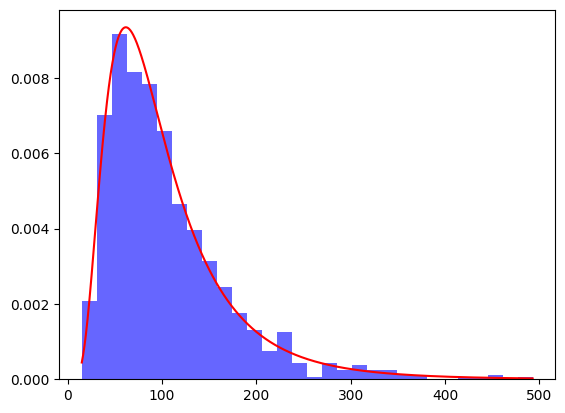

El número promedio de pasos para que un fotón escape del Sol es: 104.91
Valor teórico de E(n) = R_s / l: 100.00
Diferencia entre la simulación y el valor teórico: 4.91


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponweib

# Parámetros del problema
l = 0.1  # Camino libre medio (en unidades de distancia)
r_s = 1  # Radio del Sol (en unidades de distancia)
N = 1000  # Número de fotones

# Función para simular el camino de un fotón
def escape_time():
    # Posición inicial
    x, y, z = 0, 0, 0
    steps = 0

    while np.sqrt(x**2 + y**2 + z**2) <= r_s:
        # Generar ángulos aleatorios theta y phi
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2*np.pi)

        # Actualizar las coordenadas usando las ecuaciones
        x += l * np.sin(theta) * np.cos(phi)
        y += l * np.sin(theta) * np.sin(phi)
        z += l * np.cos(theta)

        steps += 1

    return steps

# Simular el tiempo de escape para N fotones
escape_times = [escape_time() for _ in range(N)]

# Calcular el número promedio de pasos
average_escape_time = np.mean(escape_times)

# Calcular el valor teórico de E(n) según la fórmula
theoretical_escape_time = (r_s /0.1)**2

# Ajuste de la distribución Weibull a los datos
a, c, d, e = exponweib.fit(escape_times, floc=0)  # Ajustamos con loc=0

# Graficar el histograma de los pasos
plt.hist(escape_times, bins=30, density=True, alpha=0.6, color='blue', label="Histograma")

# Generar la curva ajustada de Weibull
x_values = np.linspace(min(escape_times), max(escape_times), 1000)
y_values = exponweib.pdf(x_values, a, c, loc=d, scale=e)

# Graficar la distribución ajustada
plt.plot(x_values, y_values, 'r-', label=f'Ajuste Weibull: a={a:.2f}, c={c:.2f}, loc={d:.2f}, scale={e:.2f}')

# Mostrar el valor promedio y el valor teórico


# Mostrar la gráfica
plt.show()

# Mostrar el resultado
print(f"El número promedio de pasos para que un fotón escape del Sol es: {average_escape_time:.2f}")
print(f"Valor teórico de E(n) = R_s / l: {theoretical_escape_time:.2f}")
print(f"Diferencia entre la simulación y el valor teórico: {abs(average_escape_time - theoretical_escape_time):.2f}")


Distribución Maxwell-Boltzmann

La temperatura optimizada es: 295.92 K


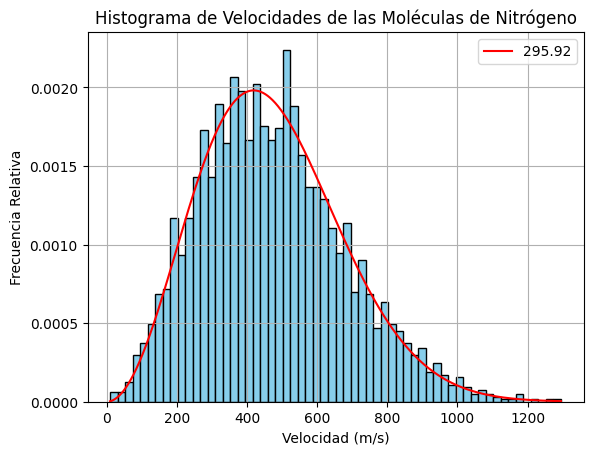

El valor promedio empírico de la velocidad es: 472.15 m/s
La velocidad más probable del nitrógeno a 295.92 K es: 419.11 m/s
La velocidad promedio del nitrógeno a 295.92 K es: 472.91 m/s
La velocidad cuadrática media del nitrógeno a 295.92 K es: 513.30 m/s


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parámetros conocidos
k_B = 8.31  # Constante de Boltzmann en J/partícula·K
m = 0.028  # Masa de la molécula de nitrógeno en kg

# Función de likelihood basada en la distribución de Maxwell-Boltzmann
def likelihood(v, m, T, k_B):
    # f(v) = (m / (2πk_B T))^(3/2) * 4πv^2 * exp(-mv^2 / (2k_B T))
    prefactor = (m / (2 * np.pi * k_B * T))**(3/2) * 4 * np.pi * v**2
    exponent = np.exp(-m * v**2 / (2 * k_B * T))
    return prefactor * exponent

# Función de ajuste para los datos del histograma
def fit_func(v, T, m, k_B):
    return likelihood(v, m, T, k_B)

# Cargar los datos
velocidades = np.loadtxt('Velocidad gas.txt', skiprows=1)

# Crear el histograma con n=60 bines
frecuencia, bins, _ = plt.hist(velocidades, bins=60, density=True, color='skyblue', edgecolor='black')

# Calcular los centros de los bines
centros_bins = 0.5 * (bins[1:] + bins[:-1])

# Inicializar un valor estimado para la temperatura T (puedes elegir un valor inicial)
T_inicial = 700  # Estimación inicial de la temperatura en Kelvin

# Ajustar el modelo usando 'curve_fit'
# Aquí estamos ajustando la temperatura T para que el modelo de Maxwell-Boltzmann se ajuste al histograma
popt, _ = curve_fit(lambda v, T: fit_func(v, T, m, k_B), centros_bins, frecuencia, p0=[T_inicial])

# La temperatura optimizada es el primer valor de 'popt'
T_optima = popt[0]

# Mostrar el resultado de la optimización
print(f"La temperatura optimizada es: {T_optima:.2f} K")

# Paso 3: Personalizar el gráfico
plt.title('Histograma de Velocidades de las Moléculas de Nitrógeno')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia Relativa')
plt.grid(True)

# Graficar la función de likelihood optimizada sobre el histograma
v = np.linspace(min(velocidades), max(velocidades), 1000)  # Definir el rango de velocidades para graficar
plt.plot(v, likelihood(v, m, T_optima, k_B), color='red', label=f'{T_optima:.2f}')
plt.legend()
# Mostrar el gráfico
plt.show()

# Calcular el valor promedio empírico (como antes)
promedio_empirico = np.sum(frecuencia * centros_bins) * (bins[1] - bins[0])

# Mostrar el resultado
print(f"El valor promedio empírico de la velocidad es: {promedio_empirico:.2f} m/s")

def velocidad_mas_probable(T, M):
    vp = math.sqrt(2 * R * T / M)
    return vp

vp = velocidad_mas_probable(T_optima, M_nitrogeno)


print(f"La velocidad más probable del nitrógeno a {T_optima:.2f} K es: {vp:.2f} m/s")

def velocidad_promedio(V):
  Vm= (2/np.sqrt(np.pi))*V
  return Vm

Vm= velocidad_promedio(vp)
print(f"La velocidad promedio del nitrógeno a {T_optima:.2f} K es: {Vm:.2f} m/s")
def velocidad_cuadratica_media(T, M):
    v2 = math.sqrt(3 * R * T / M)
    return v2



v2= velocidad_cuadratica_media(T_optima, M_nitrogeno)
print(f"La velocidad cuadrática media del nitrógeno a {T_optima:.2f} K es: {v2:.2f} m/s")

